In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

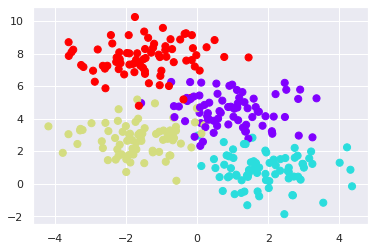

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [13]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/home/cesar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


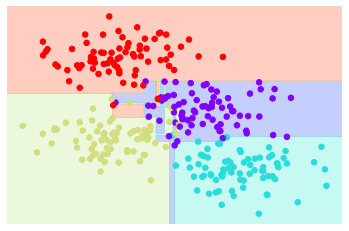

In [14]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from math import sqrt

#Clasifiers
from sklearn import preprocessing
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'xgboost'

In [1]:
import xgboost

In [2]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data

--2019-11-04 16:25:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 25964 (25K) [application/x-httpd-php]
Guardando como: “dermatology.data”

dermatology.data    100%[===================>]  25.36K  --.-KB/s    en 0.1s    

2019-11-04 16:25:04 (228 KB/s) - “dermatology.data” guardado [25964/25964]



In [4]:
from __future__ import division

import numpy as np
import xgboost as xgb

# label need to be 0 to num_class -1
data = np.loadtxt('./dermatology.data', delimiter=',',
        converters={33: lambda x:int(x == '?'), 34: lambda x:int(x) - 1})
sz = data.shape

train = data[:int(sz[0] * 0.7), :]
test = data[int(sz[0] * 0.7):, :]

train_X = train[:, :33]
train_Y = train[:, 34]

test_X = test[:, :33]
test_Y = test[:, 34]

xg_train = xgb.DMatrix(train_X, label=train_Y)
xg_test = xgb.DMatrix(test_X, label=test_Y)


In [16]:
test_X.shape

(110, 33)

In [17]:
train_X.shape

(256, 33)

In [18]:
int(sz[0] * 0.7)

256

In [32]:
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 100
param['silent'] = 0
param['nthread'] = 4
param['num_class'] = 6

watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 5
bst = xgb.train(param, xg_train, num_round, watchlist)
# get prediction
pred = bst.predict(xg_test)
error_rate = np.sum(pred != test_Y) / test_Y.shape[0]
print('Test error using softmax = {}'.format(error_rate))

# do the same thing again, but output probabilities
param['objective'] = 'multi:softprob'
bst = xgb.train(param, xg_train, num_round, watchlist)
# Note: this convention has been changed since xgboost-unity
# get prediction, this is in 1D array, need reshape to (ndata, nclass)
pred_prob = bst.predict(xg_test).reshape(test_Y.shape[0], 6)
pred_label = np.argmax(pred_prob, axis=1)
error_rate = np.sum(pred_label != test_Y) / test_Y.shape[0]
print('Test error using softprob = {}'.format(error_rate))

[0]	train-merror:0.011719	test-merror:0.127273
[1]	train-merror:0.015625	test-merror:0.127273
[2]	train-merror:0.011719	test-merror:0.109091
[3]	train-merror:0.007812	test-merror:0.081818
[4]	train-merror:0.007812	test-merror:0.090909
Test error using softmax = 0.09090909090909091
[0]	train-merror:0.011719	test-merror:0.127273
[1]	train-merror:0.015625	test-merror:0.127273
[2]	train-merror:0.011719	test-merror:0.109091
[3]	train-merror:0.007812	test-merror:0.081818
[4]	train-merror:0.007812	test-merror:0.090909
Test error using softprob = 0.09090909090909091
